# IK Ergo Jr #

Some imports first.

In [1]:
import matplotlib.pyplot
%matplotlib notebook

First, instantiate your Creature

In [2]:
from poppy.creatures import PoppyErgoJr


poppy = PoppyErgoJr(simulator='vrep')

# Forward Kinematics #

To access the Forwards Kinematics of the Ergo Jr : 

In [3]:
poppy.chain.end_effector

array([-0.00639948, -0.17440312,  0.15083097])

# Plotting

<IPython.core.display.Javascript object>


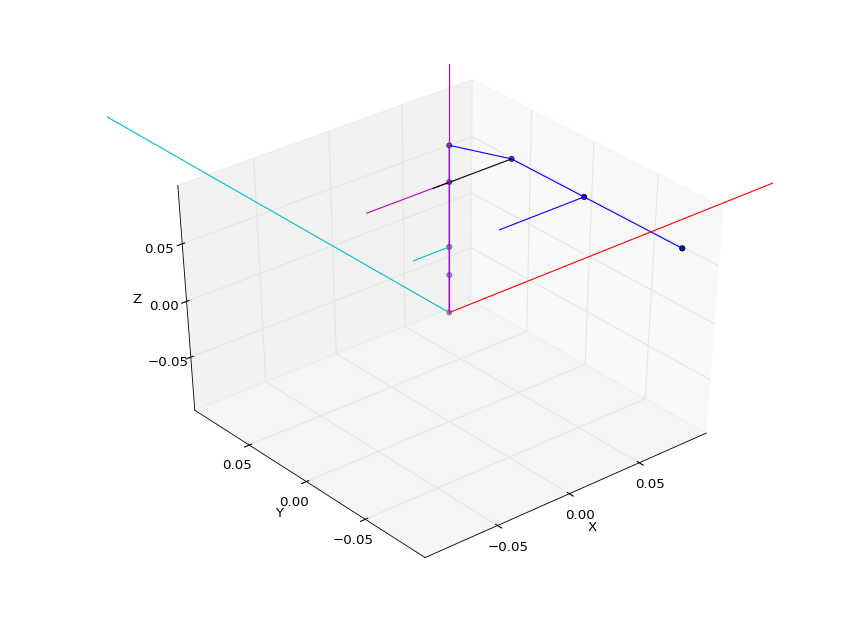

In [3]:
zero = [0] * 6

ax = matplotlib.pyplot.figure().add_subplot(111, projection='3d')
poppy.chain.plot(poppy.chain.convert_to_ik_angles(zero), ax)

# Inverse Kinematics

In [5]:
from ipywidgets import interact, FloatSlider

poppy.reset_simulation()

c = poppy.chain

x, y, z = c.end_effector
size = 0.3

def goto(x, y, z):
    c.goto((x, y, z), .1)
    
interact(goto, 
         x=FloatSlider(min=x-size, max=x+size, value=x, step=0.01), 
         y=FloatSlider(min=y-size, max=y+size, value=y, step=0.01), 
         z=FloatSlider(min=z-size, max=z+size, value=z, step=0.01))